In [1]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
import statistics
%config Completer.use_jedi = False
from sklearn.preprocessing import QuantileTransformer

In [2]:
X = pd.read_csv("/Users/macbookpro/Documents/GitHub/IronBiagio/Customer_Analysis_Case_Study/Data/df_X_modified.csv")
Y = pd.read_csv("/Users/macbookpro/Documents/GitHub/IronBiagio/Customer_Analysis_Case_Study/Data/df_Y_modified.csv")

-Linear Regression:
Train-test split.
Standardize the data (after the data split).
Apply linear regression.
Model Interpretation.
Model Validation

-Model Evaluation:
MSE.
RMSE.
MAE.
R2.
Adjusted R2.
Feature Importance.

In [3]:
X

,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,...,Vehicle Class,Vehicle Size,Vehicle Type,Number of Open Complaints,Number of Policies,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception
0,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,...,SUV,Medsize,A,0.0,2,14947.92,22139.0,100,34.0,31
1,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,...,Four-Door Car,Medsize,A,0.0,2,22332.44,49078.0,97,10.0,3
2,Arizona,No,Extended,High School or Below,1/2/11,Employed,M,Urban,Married,Corporate Auto,...,SUV,Large,A,0.0,1,5154.76,82730.0,127,13.0,31
3,California,No,Basic,Master,1/26/11,Employed,M,Suburban,Single,Personal Auto,...,Two-Door Car,Medsize,A,0.0,4,5454.59,66334.0,69,25.0,25
4,California,No,Basic,High School or Below,2/7/11,Employed,F,Urban,Married,Personal Auto,...,Two-Door Car,Large,A,0.0,6,5326.68,76717.0,66,26.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3365,Arizona,Yes,Basic,Master,1/26/11,Employed,M,Rural,Single,Personal Auto,...,Sports Car,Medsize,A,0.0,8,9075.77,37722.0,116,8.0,23
3366,California,No,Extended,High School or Below,1/24/11,Employed,F,Suburban,Married,Personal Auto,...,Four-Door Car,Medsize,A,2.0,1,3579.02,28304.0,91,10.0,30
3367,Arizona,No,Basic,College,1/7/11,Employed,M,Suburban,Married,Personal Auto,...,Two-Door Car,Medsize,A,4.0,1,2771.66,59855.0,74,30.0,82
3368,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,...,Four-Door Car,Medsize,A,0.0,6,5259.44,61146.0,65,7.0,68


In [4]:
Y = Y["Total Claim Amount"]
Y

0       480.00
1       484.01
2       442.52
3       331.20
4       300.53
         ...  
3365    158.08
3366    655.20
3367    355.20
3368    273.02
3369    618.29
Name: Total Claim Amount, Length: 3370, dtype: float64

In [5]:
Xn = X.select_dtypes(np.number)
Xc = X.select_dtypes("object")

In [6]:
Xn

,Number of Open Complaints,Number of Policies,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception
0,0.0,2,14947.92,22139.0,100,34.0,31
1,0.0,2,22332.44,49078.0,97,10.0,3
2,0.0,1,5154.76,82730.0,127,13.0,31
3,0.0,4,5454.59,66334.0,69,25.0,25
4,0.0,6,5326.68,76717.0,66,26.0,10
...,...,...,...,...,...,...,...
3365,0.0,8,9075.77,37722.0,116,8.0,23
3366,2.0,1,3579.02,28304.0,91,10.0,30
3367,4.0,1,2771.66,59855.0,74,30.0,82
3368,0.0,6,5259.44,61146.0,65,7.0,68


In [7]:
Xn_train, Xn_test, Y_train, Y_test = train_test_split(Xn, Y, test_size=.30, random_state=123)


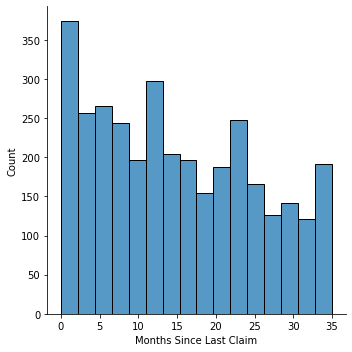

In [8]:
sns.displot(Xn["Months Since Last Claim"])

In [9]:
std_scaler=StandardScaler().fit(Xn_train) 
Xn_train_scaled=std_scaler.transform(Xn_train)
Xn_test_scaled=std_scaler.transform(Xn_test)


In [10]:
#qt = QuantileTransformer(output_distribution="normal").fit(Xn_train_scaled)
#Xn_train_norm = qt.transform(Xn_train_scaled)
#sns.displot(Xn_train_norm)

In [11]:
model = LinearRegression()
model.fit(Xn_train_scaled, Y_train)

LinearRegression()

In [12]:
model.coef_


array([  0.23461481,   5.23981826,  -6.7620998 , -55.38094472,
       167.31166393,  -6.24460199,  -5.45414925])

In [13]:
model.intercept_


378.1744001695634

In [14]:
model.score(Xn_test_scaled,Y_test)


0.43820055170594974

In [15]:
Y_pred=model.predict(Xn_test_scaled)   # model prediction


In [17]:
result=pd.DataFrame({"Y_test":Y_test, "Y_pred":Y_pred})
result

,Y_test,Y_pred
586,523.89,341.292016
1918,355.20,190.902281
3297,395.73,360.365207
2687,321.60,325.801258
541,394.97,467.695743
...,...,...
221,355.20,305.383493
3061,199.28,240.184767
1027,412.80,413.469307
2083,297.60,282.451973


In [ ]:
pd.concat("Y_pred")

In [ ]:
Y_pred

In [23]:
MSE = np.mean( np.power( Y_test - Y_pred , 2 ) )
print(MSE)

38251.6707570709


In [30]:
from sklearn.metrics import mean_squared_error, r2_score
print("The mean_squared_error is {:.2f}".format(mean_squared_error(Y_test,Y_pred)))
print("The R2 is {:.2f}".format(r2_score(Y_test,Y_pred)))

The mean_squared_error is 38251.67
The R2 is 0.44


In [32]:
R2=(r2_score(Y_test,Y_pred))
Adj_R2= 1 - (1-R2)*(len(Y_test)-1)/(len(Y_test)-Xn_test.shape[1]-1)
Adj_R2

0.43427971806880283

In [24]:
RMSE = np.sqrt(MSE)
RMSE

195.58034348336466

In [29]:
MAE = np.mean( np.abs( Y_test - Y_pred ) )
MAE

139.72692916581593

In [27]:
features_importances = pd.DataFrame(data={
    'Attribute': Xn_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)
features_importances

,Attribute,Importance
4,Monthly Premium Auto,167.311664
3,Income,55.380945
2,Customer Lifetime Value,6.762100
5,Months Since Last Claim,6.244602
6,Months Since Policy Inception,5.454149
1,Number of Policies,5.239818
0,Number of Open Complaints,0.234615
